In [3]:
import pandas as pd
import numpy as np
cir_sim = pd.read_csv("../data/gene_seq_sim.csv", index_col=0, dtype=np.float32).to_numpy()  
drug_sim=pd.read_csv("../data/drug_str_sim.csv", index_col=0, dtype=np.float32).to_numpy()
mask = ~np.eye(cir_sim.shape[0], dtype=bool)
cir_sim = cir_sim[mask].reshape(cir_sim.shape[0], cir_sim.shape[1] - 1)
mask = ~np.eye(drug_sim.shape[0], dtype=bool)
drug_sim = drug_sim[mask].reshape(drug_sim.shape[0], drug_sim.shape[1] - 1)

/tmp/ipykernel_525/1435216166.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


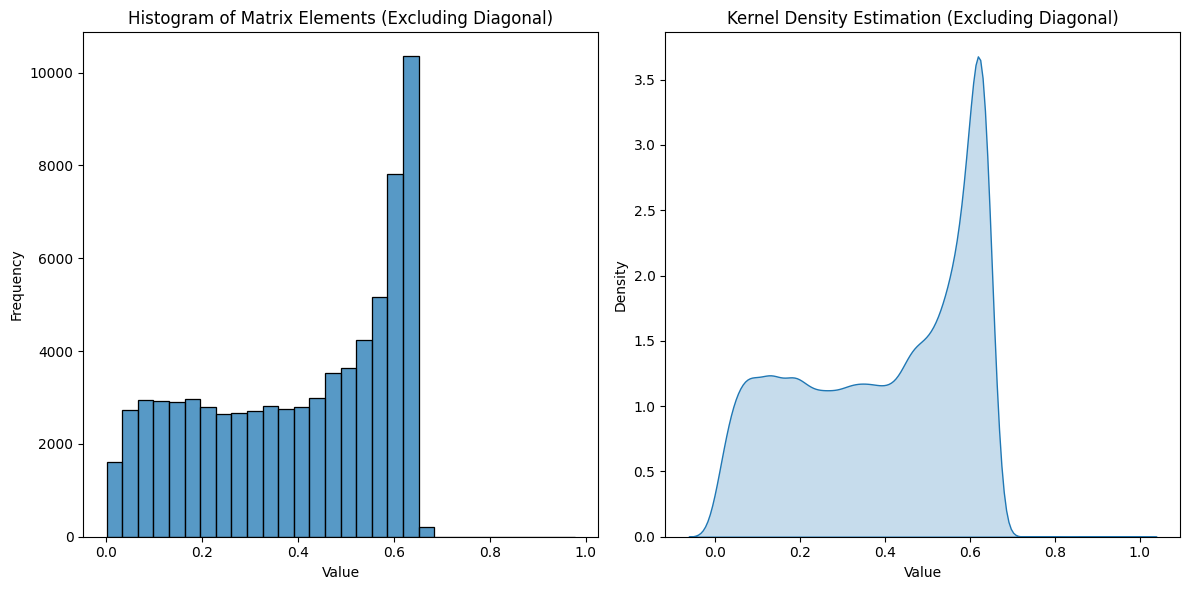

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [element for row in cir_sim for element in row]

plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=False)
plt.title('Histogram of Matrix Elements (Excluding Diagonal)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 核密度估计图
plt.subplot(1, 2, 2)
sns.kdeplot(data, shade=True)
plt.title('Kernel Density Estimation (Excluding Diagonal)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

/tmp/ipykernel_525/2774631620.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True)


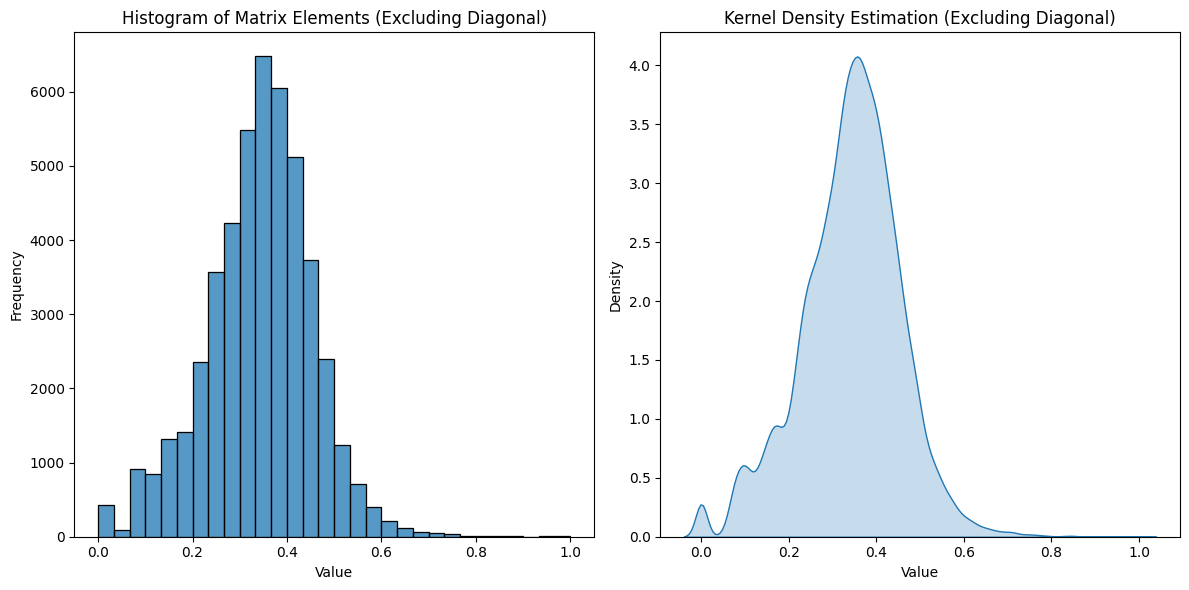

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [element for row in drug_sim for element in row]

plt.figure(figsize=(12, 6))

# 直方图
plt.subplot(1, 2, 1)
sns.histplot(data, bins=30, kde=False)
plt.title('Histogram of Matrix Elements (Excluding Diagonal)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 核密度估计图
plt.subplot(1, 2, 2)
sns.kdeplot(data, shade=True)
plt.title('Kernel Density Estimation (Excluding Diagonal)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [6]:
# 示例列表
lst = [element for row in cir_sim for element in row]

# 对列表进行排序
sorted_lst = sorted(lst)

# 计算1/3和2/3位置的索引
n = len(sorted_lst)
index_1_3 = n // 3
index_2_3 = 2 * n // 3

# 获取对应位置的值
value_1_3 = sorted_lst[index_1_3]
value_2_3 = sorted_lst[index_2_3]

# 打印结果
print(f"排序后1/3处的值: {value_1_3}")
print(f"排序后2/3处的值: {value_2_3}")

排序后1/3处的值: 0.29610514640808105
排序后2/3处的值: 0.5471180081367493


In [7]:
# 示例列表
lst = [element for row in drug_sim for element in row]

# 对列表进行排序
sorted_lst = sorted(lst)

# 计算1/3和2/3位置的索引
n = len(sorted_lst)
index_1_3 = n // 3
index_2_3 = 2 * n // 3

# 获取对应位置的值
value_1_3 = sorted_lst[index_1_3]
value_2_3 = sorted_lst[index_2_3]

# 打印结果
print(f"排序后1/3处的值: {value_1_3}")
print(f"排序后2/3处的值: {value_2_3}")

排序后1/3处的值: 0.30424338579177856
排序后2/3处的值: 0.3906455934047699


In [8]:
# 示例列表
lst = [element for row in cir_sim for element in row]

# 对列表进行排序
sorted_lst = sorted(lst)

# 计算1/3和2/3位置的索引
n = len(sorted_lst)
index_1_2 = n // 2

# 获取对应位置的值
value_1_2 = sorted_lst[index_1_2]

# 打印结果
print(f"排序后1/2处的值: {value_1_2}")

排序后1/2处的值: 0.4391426146030426


In [9]:
# 示例列表
lst = [element for row in drug_sim for element in row]

# 对列表进行排序
sorted_lst = sorted(lst)

# 计算1/3和2/3位置的索引
n = len(sorted_lst)
index_1_2 = n // 2

# 获取对应位置的值
value_1_2 = sorted_lst[index_1_2]

print(f"排序后1/2处的值: {value_1_2}")

排序后1/2处的值: 0.3489416241645813


In [ ]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv("/home/fanziyu/project/LSGNN_fzy/src/data/association.csv", index_col=0)  # 假设第一列为索引列

# 去除第一行和第一列
matrix_data = df.iloc[:, :].values

# 显示矩阵
print(matrix_data.shape)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ones_count_per_column = np.sum(matrix_data == 1, axis=0)
print(len(ones_count_per_column))
# 绘制直方图
plt.hist(ones_count_per_column, bins=np.arange(np.max(ones_count_per_column) + 2) - 0.5, edgecolor='black')
plt.xlabel('Interaction degree of drugs')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ones_count_per_column = np.sum(matrix_data == 1, axis=1)
print(len(ones_count_per_column))
# 绘制直方图
plt.hist(ones_count_per_column, bins=np.arange(np.max(ones_count_per_column) + 2) - 0.5, edgecolor='black')
plt.xlabel('Interaction degree of circRNAs')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

In [3]:
import asyncio
from aiohttp import TCPConnector, ClientSession

import pyecharts.options as opts
from pyecharts.charts import Graph

async def get_json_data(url: str) -> dict:
    async with ClientSession(connector=TCPConnector(ssl=False)) as session:
        async with session.get(url=url) as response:
            return await response.json()


# 获取官方的数据
# data = asyncio.run(
#     get_json_data(
#         url="https://echarts.apache.org/examples/data/asset/data/npmdepgraph.min10.json"
#     )
# )
data = await get_json_data(
        url="https://echarts.apache.org/examples/data/asset/data/npmdepgraph.min10.json"
    )

nodes = [
    {
        "x": node["x"],
        "y": node["y"],
        "id": node["id"],
        "name": node["label"],
        "symbolSize": node["size"],
        "itemStyle": {"normal": {"color": node["color"]}},
    }
    for node in data["nodes"]
]

edges = [
    {"source": edge["sourceID"], "target": edge["targetID"]} for edge in data["edges"]
]


(
    Graph()
    .add(
        series_name="",
        nodes=nodes,
        links=edges,
        layout="none",
        is_roam=True,
        is_focusnode=True,
        label_opts=opts.LabelOpts(is_show=False),
        linestyle_opts=opts.LineStyleOpts(width=0.5, curve=0.3, opacity=0.7),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="NPM Dependencies"))
    .render("npm_dependencies.html")
)



'/ifs/data/fanziyu/project/LSGNN_fzy/src/img/npm_dependencies.html'

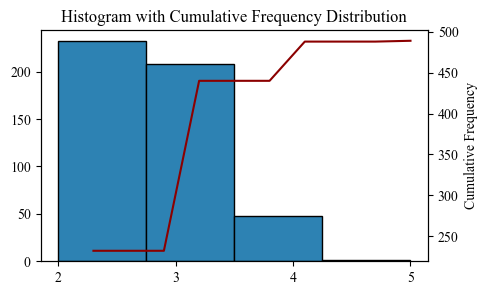

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.family'] = 'Times New Roman'
np.random.seed(0)
data=
plt.figure(figsize=(5, 3)) 
plt.hist(data,bins=4,edgecolor='black',color="#2d82b3",cumulative=False, density=False)
hist,bin_edges=np.histogram(data,bins=10)
cumulative_freg =np.cumsum(hist)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(bin_edges[1:], cumulative_freg, 'darkred')
ax2.set_ylabel('Cumulative Frequency')
plt.title("Histogram with Cumulative Frequency Distribution")
plt.xlabel("Value")
plt.ylabel("Cumulative Frequency")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

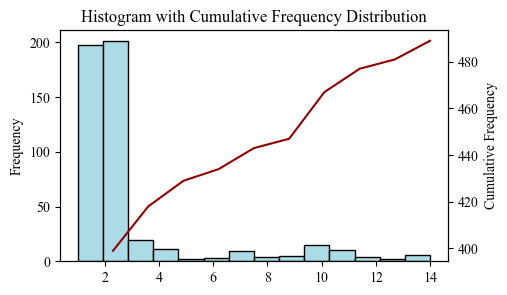

In [24]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# 创建图表并设置尺寸
plt.figure(figsize=(5, 3))

# 绘制直方图
plt.hist(data, bins=14, edgecolor='black', color="#abdbe7", cumulative=False, density=False, align='mid')

# 计算直方图的频率和区间边界
hist, bin_edges = np.histogram(data, bins=10)

# 计算累积频率
cumulative_freq = np.cumsum(hist)

# 获取当前的轴对象
ax = plt.gca()

# 创建共享x轴的新的y轴
ax2 = ax.twinx()

# 绘制累积频率分布线图
ax2.plot(bin_edges[1:], cumulative_freq, 'darkred')
ax2.set_ylabel('Cumulative Frequency')

# 设置图表标题和标签
plt.title("Histogram with Cumulative Frequency Distribution")
plt.xlabel("Value")
ax.set_ylabel("Frequency")  # 为第一个y轴设置标签

# 显示图表
plt.show()

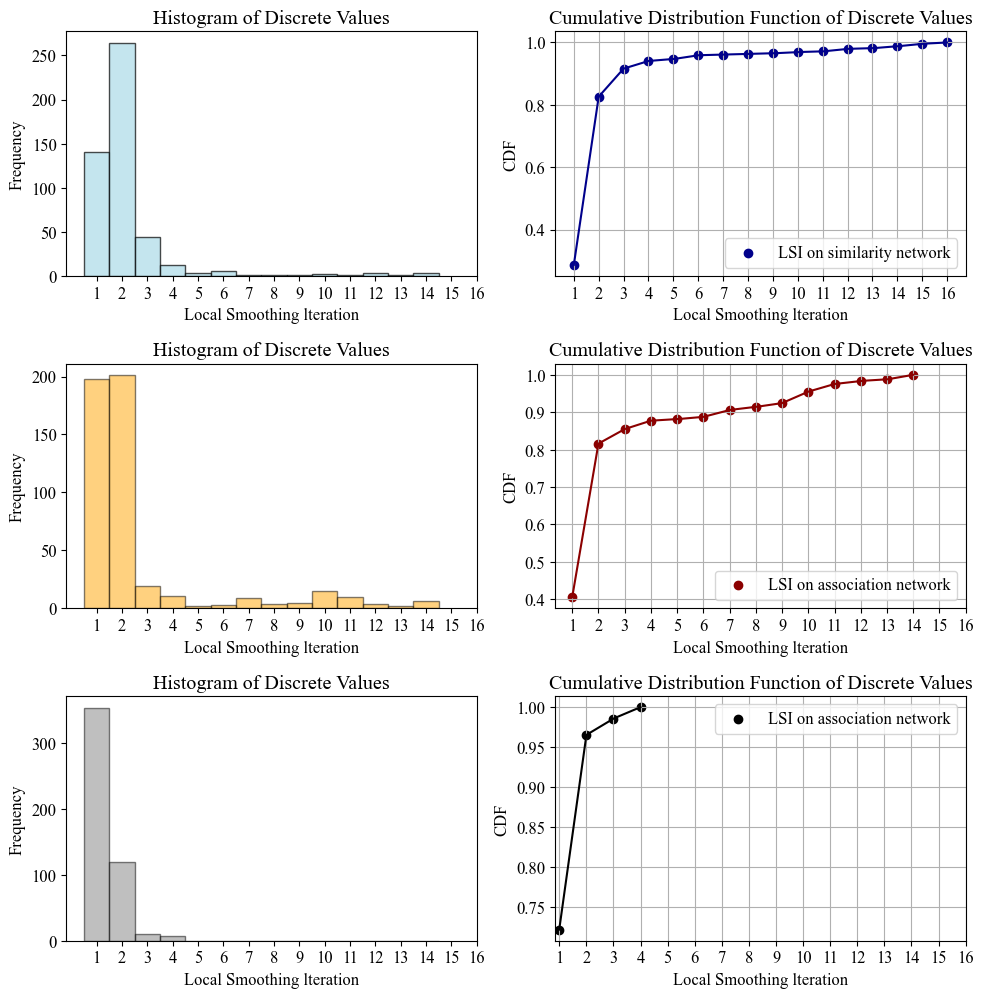

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
np.random.seed(0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 计算数据的CDF
values, counts = np.unique(data, return_counts=True)
cumulative_counts = np.cumsum(counts)
cumulative_prob = cumulative_counts / len(data)
# 计算离散数据的CDF
values, counts = np.unique(data, return_counts=True)
cumulative_counts = np.cumsum(counts)
cumulative_prob = cumulative_counts / len(data)
# 创建插值函数
cdf_interpolator = interp1d(values, cumulative_prob, kind='linear', fill_value="extrapolate")
# 生成平滑的x值
x_smooth = np.linspace(values.min(), values.max(), 500)
y_smooth = cdf_interpolator(x_smooth)

# 计算数据的CDF
values2, counts2 = np.unique(data2, return_counts=True)
cumulative_counts2 = np.cumsum(counts2)
cumulative_prob2 = cumulative_counts2 / len(data2)
# 计算离散数据的CDF
values2, counts2 = np.unique(data2, return_counts=True)
cumulative_counts2 = np.cumsum(counts2)
cumulative_prob2 = cumulative_counts2 / len(data2)
# 创建插值函数
cdf_interpolator2 = interp1d(values2, cumulative_prob2, kind='linear', fill_value="extrapolate")
# 生成平滑的x值
x_smooth2 = np.linspace(values2.min(), values2.max(), 500)
y_smooth2 = cdf_interpolator2(x_smooth2)

# 计算数据的CDF
values3, counts3 = np.unique(data3, return_counts=True)
cumulative_counts3 = np.cumsum(counts3)
cumulative_prob3 = cumulative_counts3 / len(data3)
# 计算离散数据的CDF
values3, counts3 = np.unique(data3, return_counts=True)
cumulative_counts3 = np.cumsum(counts3)
cumulative_prob3 = cumulative_counts3 / len(data3)
# 创建插值函数
cdf_interpolator3 = interp1d(values3, cumulative_prob3, kind='linear', fill_value="extrapolate")
# 生成平滑的x值
x_smooth3 = np.linspace(values3.min(), values3.max(), 500)
y_smooth3 = cdf_interpolator3(x_smooth3)


# 创建图表并设置尺寸
plt.figure(figsize=(10, 13))
# 绘制直方图
plt.subplot(4, 2, 1)  # 将图表划分为2行1列，并在第1个位置创建子图
plt.hist(data, bins=np.arange(1, 16) - 0.5, edgecolor='black', alpha=0.7,color="#abdbe7", density=False, align='mid')
# plt.hist(data2, bins=np.arange(1, 16) - 0.5, edgecolor='black',alpha=0.5, color="orange", density=False, align='mid')
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.title("Histogram of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("Frequency")
# 绘制平滑的CDF
plt.subplot(4, 2, 2)  # 在第2个位置创建子图
plt.plot(x_smooth, y_smooth, color='darkblue')
plt.scatter(values, cumulative_prob, color='darkblue', label='LSI on similarity network')  # 添加原始CDF点用于对比
# plt.plot(x_smooth2, y_smooth2, color='darkred')
# plt.scatter(values2, cumulative_prob2, color='darkred', label='LSI on association network')  # 添加原始CDF点用于对比
plt.title("Cumulative Distribution Function of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("CDF")
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.grid(True)
plt.legend()

# 绘制直方图
plt.subplot(4, 2, 3)  # 将图表划分为2行1列，并在第1个位置创建子图
plt.hist(data2, bins=np.arange(1, 16) - 0.5, edgecolor='black',alpha=0.5, color="orange", density=False, align='mid')
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.title("Histogram of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("Frequency")
# 绘制平滑的CDF
plt.subplot(4, 2, 4)  # 在第2个位置创建子图
plt.plot(x_smooth2, y_smooth2, color='darkred')
plt.scatter(values2, cumulative_prob2, color='darkred', label='LSI on association network')  # 添加原始CDF点用于对比
plt.title("Cumulative Distribution Function of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("CDF")
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.grid(True)
plt.legend()

# 绘制直方图
plt.subplot(4, 2, 5)  # 将图表划分为2行1列，并在第1个位置创建子图
plt.hist(data3, bins=np.arange(1, 16) - 0.5, edgecolor='black',alpha=0.5, color="gray", density=False, align='mid')
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.title("Histogram of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("Frequency")
# 绘制平滑的CDF
plt.subplot(4, 2, 6)  # 在第2个位置创建子图
plt.plot(x_smooth3, y_smooth3, color='black')
plt.scatter(values3, cumulative_prob3, color='black', label='LSI on association network')  # 添加原始CDF点用于对比
plt.title("Cumulative Distribution Function of Discrete Values")
plt.xlabel("Local Smoothing lteration")
plt.ylabel("CDF")
plt.xticks(np.arange(1, 17))  # 设置x轴刻度为离散值
plt.grid(True)

# 调整子图之间的间距
plt.tight_layout()

plt.legend()
# 显示图表
plt.show()


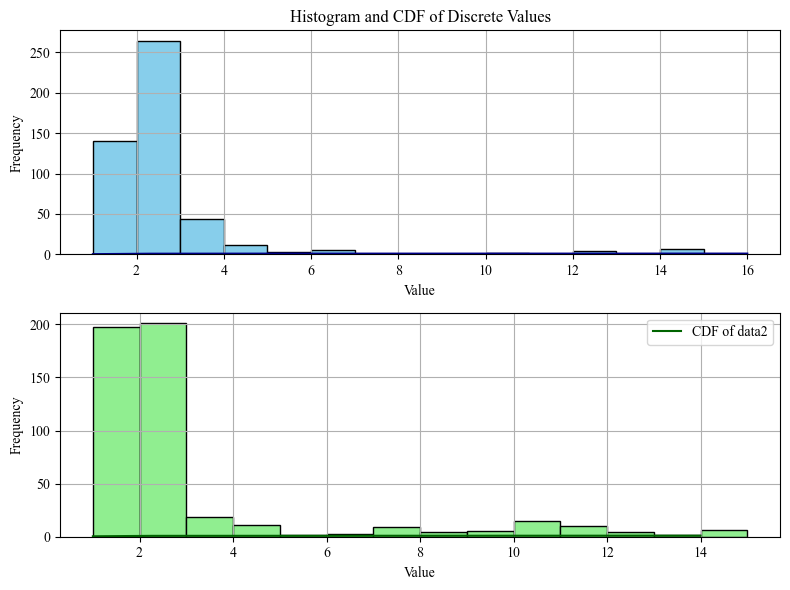

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 生成两组离散值数据
np.random.seed(0)

# 计算第一组数据的CDF
values1, counts1 = np.unique(data1, return_counts=True)
cumulative_counts1 = np.cumsum(counts1)
cumulative_prob1 = cumulative_counts1 / len(data1)

# 计算第二组数据的CDF
values2, counts2 = np.unique(data2, return_counts=True)
cumulative_counts2 = np.cumsum(counts2)
cumulative_prob2 = cumulative_counts2 / len(data2)

# 创建插值函数
cdf_interpolator1 = interp1d(values1, cumulative_prob1, kind='linear', fill_value="extrapolate")
cdf_interpolator2 = interp1d(values2, cumulative_prob2, kind='linear', fill_value="extrapolate")

# 生成平滑的x值
x_smooth1 = np.linspace(values1.min(), values1.max(), 500)
x_smooth2 = np.linspace(values2.min(), values2.max(), 500)
y_smooth1 = cdf_interpolator1(x_smooth1)
y_smooth2 = cdf_interpolator2(x_smooth2)

# 创建图表并设置尺寸
plt.figure(figsize=(8, 6))

# 绘制第一组数据的直方图
plt.subplot(2, 1, 1)
plt.hist(data1, bins=np.arange(1, 16), edgecolor='black', color='skyblue', density=False, align='mid')
plt.title("Histogram and CDF of Discrete Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

# 绘制第一组数据的CDF
plt.plot(x_smooth1, y_smooth1, color='darkblue', label='CDF of data1')

# 绘制第二组数据的直方图
plt.subplot(2, 1, 2)
plt.hist(data2, bins=np.arange(1, 16), edgecolor='black', color='lightgreen', density=False, align='mid')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

# 绘制第二组数据的CDF
plt.plot(x_smooth2, y_smooth2, color='darkgreen', label='CDF of data2')

# 添加图例
plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()


Shape of f1: (489, 489)
Shape of f2: (489, 489)


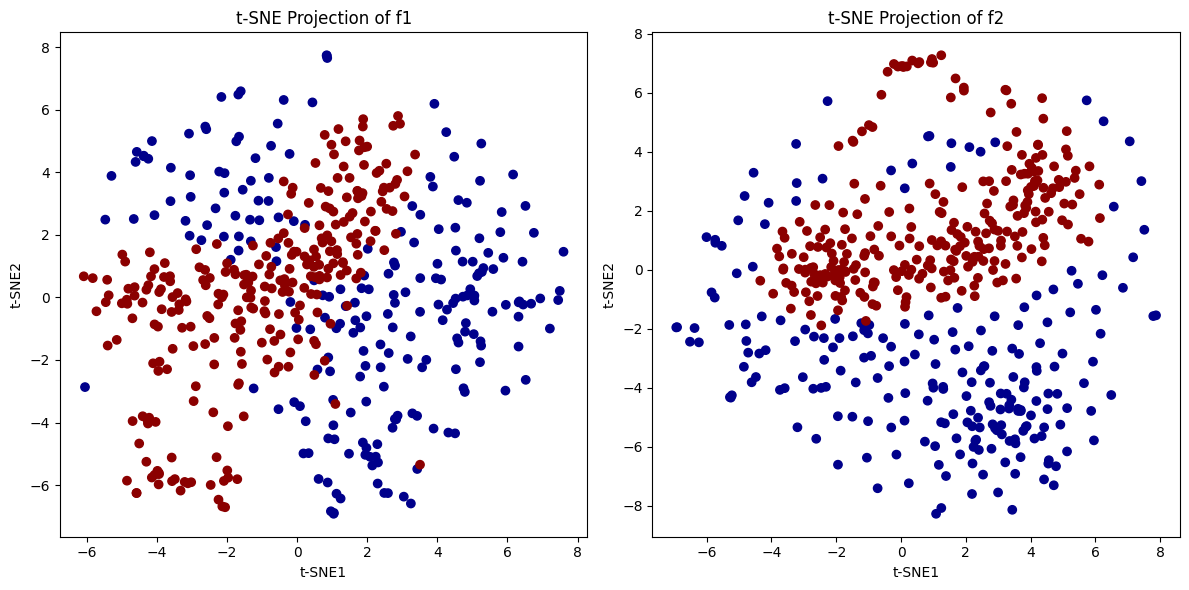

In [15]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json
with open("/ifs/data/fanziyu/project/LSGNN_fzy/src/5fold/0.json", 'r') as f:
   a = json.load(f)
   train_interact_pos = np.array(a['train_interact_pos']).tolist() # 训练对
# 从文本文件读取列表
nega = []
with open('/ifs/data/fanziyu/project/LSGNN_fzy/src/img/negative.txt', 'r') as file:
    for line in file:
        nega.append(line.strip())

pos = train_interact_pos[:len(train_interact_pos)//2]
rand = train_interact_pos[len(train_interact_pos)//2:]

# 加载实际数据
f1 = np.load('./feature_GIP_sim.npy')
f2 = np.load('./feature_NDLS.npy')

f1_sample = []
f2_sample = []

for i in pos:
    f1_sample.append(np.vstack((f1[i[0]], f1[i[1]])))
for ii in rand:
    f1_sample.append(np.vstack((f1[ii[0]], f1[ii[1]])))
for iii in nega:
    f1_sample.append(np.vstack((f1[iii[0]], f1[iii[1]])))

for j in pos:
    f2_sample.append(np.vstack((f2[j[0]], f2[j[1]])))
for jj in rand:
    f2_sample.append(np.vstack((f2[jj[0]], f2[jj[1]])))
for jjj in nega:
    f2_sample.append(np.vstack((f2[jjj[0]], f2[jjj[1]])))

# 检查数据形状
print("Shape of f1:", f1_sample.shape)
print("Shape of f2:", f2_sample.shape)

# 使用 t-SNE 对 f1 进行降维
tsne_model_f1 = TSNE(n_components=2, perplexity=min(30, f1_sample.shape[0] - 1), random_state=42)
tsne_embedding_f1 = tsne_model_f1.fit_transform(f1_sample)

# 使用 t-SNE 对 f2 进行降维
tsne_model_f2 = TSNE(n_components=2, perplexity=min(30, f2_sample.shape[0] - 1), random_state=42)
tsne_embedding_f2 = tsne_model_f2.fit_transform(f2_sample)

# 创建颜色数组
colors_f1 = np.array(['orange'] * (len(pos)) + ['gray'] * (len(pos))) + ['black'] * (len(pos))

indices = np.where(colors_f1 == 'orange')
indices2 = np.where(colors_f1 == 'gray')
indices3 = np.where(colors_f1 == 'black')


# 可视化 t-SNE 降维结果
plt.figure(figsize=(12, 6))

# t-SNE 降维结果可视化 for f1
plt.subplot(1, 2, 1)
plt.scatter(tsne_embedding_f1[indices, 0], tsne_embedding_f1[indices, 1], c='orange', s=2, label=f'positive pair')
plt.scatter(tsne_embedding_f1[indices2, 0], tsne_embedding_f1[indices2, 1], c='gray', s=2, label=f'random sample negative pair')
plt.scatter(tsne_embedding_f1[indices2, 0], tsne_embedding_f1[indices2, 1], c='black', s=2, label=f'negative pair')
plt.title('t-SNE Projection of f1')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

# t-SNE 降维结果可视化 for f2
plt.subplot(1, 2, 2)
plt.scatter(tsne_embedding_f2[indices, 0] , tsne_embedding_f2[indices, 1], c='orange', s=2, label=f'positive pair')
plt.scatter(tsne_embedding_f2[indices2, 0], tsne_embedding_f2[indices2, 1], c='gray', s=2, label=f'random sample negative pair')
plt.scatter(tsne_embedding_f2[indices2, 0], tsne_embedding_f2[indices2, 1], c='black', s=2, label=f'negative pair')
plt.title('t-SNE Projection of f2')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.tight_layout()
plt.show()
